In [242]:
from keras.datasets import mnist
import numpy as np
np.random.seed(10)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 80% !important; }</style>"))

In [243]:
from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans
import pandas as pd
import metrics
import warnings
from keras import backend as K

In [244]:
K.tensorflow_backend._get_available_gpus()
warnings.filterwarnings(action='ignore')

In [245]:
def autoencoder(dims, act='relu', init='glorot_uniform'):
    """
    Fully connected auto-encoder model, symmetric.
    Arguments:
        dims: list of number of units in each layer of encoder. dims[0] is input dim, dims[-1] is units in hidden layer.
            The decoder is symmetric with encoder. So number of layers of the auto-encoder is 2*len(dims)-1
        act: activation, not applied to Input, Hidden and Output layers
    return:
        (ae_model, encoder_model), Model of autoencoder and model of encoder
    """
    n_stacks = len(dims) - 1
    # input
    input_img = Input(shape=(dims[0],), name='input')
    x = input_img
    # internal layers in encoder
    for i in range(n_stacks-1):
        x = Dense(dims[i + 1], activation=act, kernel_initializer=init, name='encoder_%d' % i)(x)

    # hidden layer
    encoded = Dense(dims[-1], kernel_initializer=init, name='encoder_%d' % (n_stacks - 1))(x)
    
    # hidden layer, features are extracted from here

    x = encoded
    # internal layers in decoder
    for i in range(n_stacks-1, 0, -1):
        x = Dense(dims[i], activation=act, kernel_initializer=init, name='decoder_%d' % i)(x)

    # output
    x = Dense(dims[0], kernel_initializer=init, name='decoder_0')(x)
    decoded = x
    return Model(inputs=input_img, outputs=decoded, name='AE'), Model(inputs=input_img, outputs=encoded, name='encoder')

In [246]:
trains = np.loadtxt("C:/Users/KOTI/data/fashion-mnist_train.csv", skiprows=1, delimiter=',', dtype=float)
x = trains[:, 1:].reshape([len(trains), 784])
y = trains[:, 0].reshape([len(trains)])

x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)

In [247]:
n_clusters = len(np.unique(y))
x.shape

(60000, 784)

In [248]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
y_pred_kmeans = kmeans.fit_predict(x)

In [249]:
metrics.acc(y, y_pred_kmeans)

0.5406833333333333

In [250]:
#dims = [x.shape[-1], 500, 500, 2000, 10]
dims = [x.shape[-1], 500, 1000, 2000, 3000, 5000, 10]
init = VarianceScaling(scale=1. / 3., mode='fan_in',
                           distribution='uniform')
pretrain_optimizer = SGD(lr=1, momentum=0.9)
pretrain_epochs = 3000
batch_size = 256
save_dir = './results'

In [251]:
autoencoder, encoder = autoencoder(dims, init=init)

In [252]:
autoencoder.compile(optimizer=pretrain_optimizer, loss='mse')
autoencoder.fit(x, x, batch_size=batch_size, epochs=pretrain_epochs) #, callbacks=cb)
autoencoder.save_weights(save_dir + '/ae_weights.h5')

Epoch 1/300
60000/60000 [==============================] - 2s 36us/step - loss: 0.0762
Epoch 2/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0480
Epoch 3/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0347
Epoch 4/300
60000/60000 [==============================] - 2s 36us/step - loss: 0.0318
Epoch 5/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0273
Epoch 6/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0367
Epoch 7/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0259
Epoch 8/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0238
Epoch 9/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0225
Epoch 10/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0216
Epoch 11/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0210
Epoch 12/300
60000/60000 [===============

60000/60000 [==============================] - 2s 34us/step - loss: 0.0109
Epoch 95/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0109
Epoch 96/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0108
Epoch 97/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0108
Epoch 98/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0108
Epoch 99/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0108
Epoch 100/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0107
Epoch 101/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0107
Epoch 102/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0107
Epoch 103/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0107
Epoch 104/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0107
Epoch 105/300
60000/60000 [=============

60000/60000 [==============================] - 2s 34us/step - loss: 0.0094
Epoch 187/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0094
Epoch 188/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0094
Epoch 189/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0094
Epoch 190/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0094
Epoch 191/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0094
Epoch 192/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0094
Epoch 193/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0094
Epoch 194/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0093
Epoch 195/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0093
Epoch 196/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0093
Epoch 197/300
60000/60000 [========

60000/60000 [==============================] - 2s 36us/step - loss: 0.0086
Epoch 279/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0086
Epoch 280/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0086
Epoch 281/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0086
Epoch 282/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0086
Epoch 283/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0086
Epoch 284/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0086
Epoch 285/300
60000/60000 [==============================] - 2s 34us/step - loss: 0.0085
Epoch 286/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0086
Epoch 287/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0085
Epoch 288/300
60000/60000 [==============================] - 2s 35us/step - loss: 0.0085
Epoch 289/300
60000/60000 [========

In [253]:
autoencoder.load_weights(save_dir + '/ae_weights.h5')

In [254]:
class ClusteringLayer(Layer):
    """
    Clustering layer converts input sample (feature) to soft label, i.e. a vector that represents the probability of the
    sample belonging to each cluster. The probability is calculated with student's t-distribution.

    # Example
    ```
        model.add(ClusteringLayer(n_clusters=10))
    ```
    # Arguments
        n_clusters: number of clusters.
        weights: list of Numpy array with shape `(n_clusters, n_features)` witch represents the initial cluster centers.
        alpha: degrees of freedom parameter in Student's t-distribution. Default to 1.0.
    # Input shape
        2D tensor with shape: `(n_samples, n_features)`.
    # Output shape
        2D tensor with shape: `(n_samples, n_clusters)`.
    """

    def __init__(self, n_clusters, weights=None, alpha=1.0, **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        super(ClusteringLayer, self).__init__(**kwargs)
        self.n_clusters = n_clusters
        self.alpha = alpha
        self.initial_weights = weights
        self.input_spec = InputSpec(ndim=2)

    def build(self, input_shape):
        assert len(input_shape) == 2
        input_dim = input_shape[1]
        self.input_spec = InputSpec(dtype=K.floatx(), shape=(None, input_dim))
        self.clusters = self.add_weight(shape = (self.n_clusters, input_dim), initializer='glorot_uniform', name='clusters')
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
        self.built = True

    def call(self, inputs, **kwargs):
        """ student t-distribution, as same as used in t-SNE algorithm.
         Measure the similarity between embedded point z_i and centroid µ_j.
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
        Arguments:
            inputs: the variable containing data, shape=(n_samples, n_features)
        Return:
            q: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        """
        q = 1.0 / (1.0 + (K.sum(K.square(K.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.alpha))
        q **= (self.alpha + 1.0) / 2.0
        q = K.transpose(K.transpose(q) / K.sum(q, axis=1)) # Make sure each sample's 10 values add up to 1.
        return q

    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.n_clusters

    def get_config(self):
        config = {'n_clusters': self.n_clusters}
        base_config = super(ClusteringLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

In [256]:
clustering_layer = ClusteringLayer(n_clusters, name ='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

In [257]:
model.compile(optimizer=SGD(0.01, 0.9), loss='kld')

In [258]:
kmeans = KMeans(n_clusters=n_clusters, n_init=20)
y_pred = kmeans.fit_predict(encoder.predict(x))

In [259]:
y_pred_last = np.copy(y_pred)

In [260]:
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

In [261]:
# computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(0)
    return (weight.T / weight.sum(1)).T

In [262]:
loss = 0
index = 0
maxiter = 8000
update_interval = 140
index_array = np.arange(x.shape[0])

In [263]:
tol = 0.001 # tolerance threshold to stop training

In [264]:
for ite in range(int(maxiter)):
    if ite % update_interval == 0:
        q = model.predict(x, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p

        # evaluate the clustering performance
        y_pred = q.argmax(1)
        if y is not None:
            acc = np.round(metrics.acc(y, y_pred), 5)
            nmi = np.round(metrics.nmi(y, y_pred), 5)
            ari = np.round(metrics.ari(y, y_pred), 5)
            loss = np.round(loss, 5)
            print('Iter %d: acc = %.5f, nmi = %.5f, ari = %.5f' % (ite, acc, nmi, ari), ' ; loss=', loss)

        # check stop criterion - model convergence
        delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        y_pred_last = np.copy(y_pred)
        if ite > 0 and delta_label < tol:
            print('delta_label ', delta_label, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
    idx = index_array[index * batch_size: min((index+1) * batch_size, x.shape[0])]
    loss = model.train_on_batch(x=x[idx], y=p[idx])
    index = index + 1 if (index + 1) * batch_size <= x.shape[0] else 0

model.save_weights(save_dir + '/DEC_model_final.h5')

Iter 0: acc = 0.55988, nmi = 0.60731, ari = 0.43598  ; loss= 0
Iter 140: acc = 0.57238, nmi = 0.61786, ari = 0.45185  ; loss= 0.05376
Iter 280: acc = 0.58015, nmi = 0.62336, ari = 0.46023  ; loss= 0.09077
Iter 420: acc = 0.58445, nmi = 0.62666, ari = 0.46311  ; loss= 0.11441
Iter 560: acc = 0.58708, nmi = 0.62908, ari = 0.46474  ; loss= 0.10396
Iter 700: acc = 0.58837, nmi = 0.63000, ari = 0.46553  ; loss= 0.1044
Iter 840: acc = 0.58833, nmi = 0.62990, ari = 0.46527  ; loss= 0.10078
Iter 980: acc = 0.58898, nmi = 0.63021, ari = 0.46582  ; loss= 0.0991
Iter 1120: acc = 0.58882, nmi = 0.63043, ari = 0.46580  ; loss= 0.09512
Iter 1260: acc = 0.58882, nmi = 0.63049, ari = 0.46570  ; loss= 0.09496
Iter 1400: acc = 0.58962, nmi = 0.63076, ari = 0.46577  ; loss= 0.08484
Iter 1540: acc = 0.58983, nmi = 0.63155, ari = 0.46639  ; loss= 0.08558
Iter 1680: acc = 0.58937, nmi = 0.63184, ari = 0.46636  ; loss= 0.08959
Iter 1820: acc = 0.58905, nmi = 0.63147, ari = 0.46639  ; loss= 0.08068
Iter 1960:

In [265]:
model.load_weights(save_dir + '/DEC_model_final.h5')

In [266]:
# Eval.
############ redefine test data set ##############

test = np.loadtxt("C:/Users/KOTI/data/fashion-mnist_test.csv", skiprows=1, delimiter=',', dtype=float)
x = test[:, 1:].reshape([len(test), 784])
y = test[:, 0].reshape([len(test)])

x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)


q = model.predict(x, verbose=0)
p = target_distribution(q)  # update the auxiliary target distribution p

# evaluate the clustering performance
y_pred = q.argmax(1)
if y is not None:
    acc = np.round(metrics.acc(y, y_pred), 5)
    nmi = np.round(metrics.nmi(y, y_pred), 5)
    ari = np.round(metrics.ari(y, y_pred), 5)
    loss = np.round(loss, 5)
    print('Acc = %.5f, nmi = %.5f, ari = %.5f' % (acc, nmi, ari), ' ; loss=', loss)

Acc = 0.59190, nmi = 0.62840, ari = 0.46386  ; loss= 0.06219


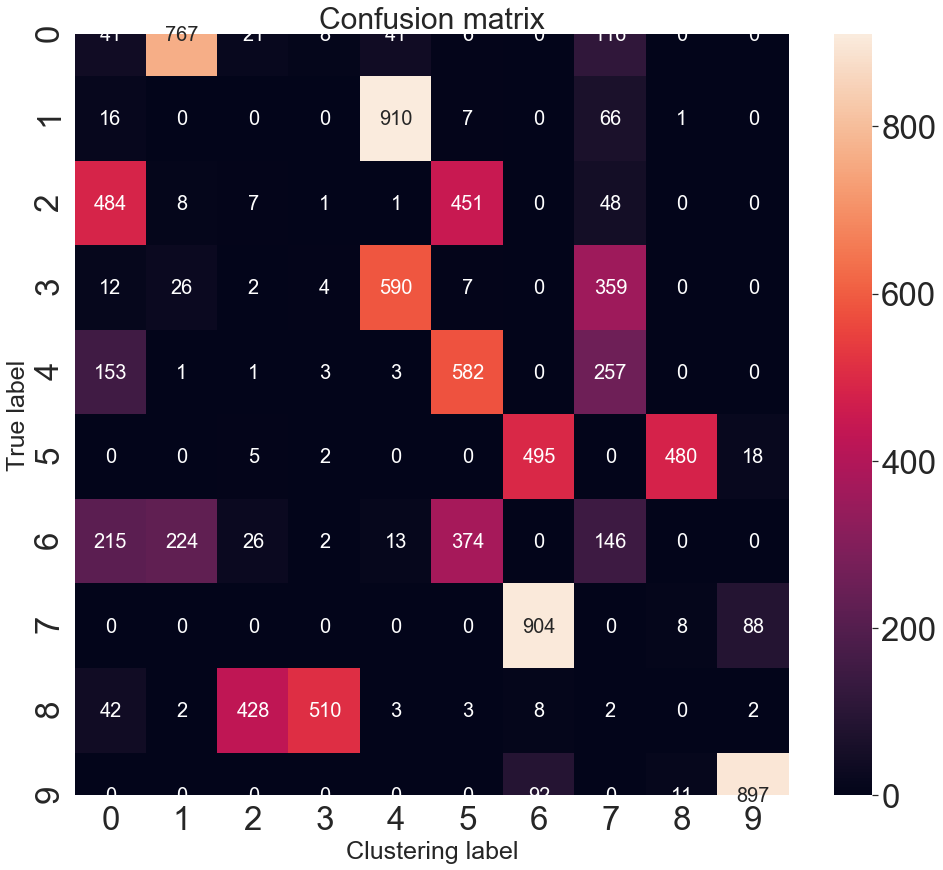

In [267]:
import seaborn as sns
import sklearn.metrics
import matplotlib.pyplot as plt
sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

In [239]:
from sklearn.utils.linear_assignment_ import linear_assignment

y_true = y.astype(np.int64)
D = max(y_pred.max(), y_true.max()) + 1
w = np.zeros((D, D), dtype=np.int64)
# Confusion matrix.
for i in range(y_pred.size):
    w[y_pred[i], y_true[i]] += 1
ind = linear_assignment(-w)

sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size

0.9499

In [240]:
w

array([[   1,    1,    0,   15,    0,  848,   32,    0,   13,    1],
       [   3,    4,    9,    0,   10,   11,  904,    0,    4,    3],
       [   1,    1,   10,   10,    1,    1,    0,  972,    8,   29],
       [   2,    6,   15,    8,    2,    2,    2,    1,  901,    6],
       [ 971,    0,    9,    0,    1,    6,    9,    2,    4,    8],
       [   1,    6,  970,   16,    3,    3,    1,   25,    7,    2],
       [   1,    1,    6,    0,  936,    1,    7,    3,    4,   14],
       [   0,    3,   10,  960,    0,   13,    0,    0,   11,   18],
       [   0,    0,    3,    1,   29,    7,    0,   17,   21,  924],
       [   0, 1113,    0,    0,    0,    0,    3,    8,    1,    4]],
      dtype=int64)

In [241]:
y_pred = y_pred.reshape(-1, 1)
y = y.reshape(-1, 1)
df = pd.DataFrame(y, columns = ['true'])
df['cluster_id'] = y_pred
df.to_excel('C:/Users/KOTI/project/AI_traffic_management/Deep Clustering/DenseLayer/results/test.xlsx', index = False )